In [1]:
from aqua.util import load_yaml, get_arg, create_folder, dump_yaml

In [2]:
import pandas as pd
from pandas import json_normalize
import glob

In [6]:
machines = ["lumi", "mn4"]
ensembles = ["p000", "p001", "p002", "p003"]

consolidated_df = pd.DataFrame()
data= {}
for machine in machines:
    data_ensembles= {}
    for ensemble in ensembles:
        pattern = f"/gpfs/scratch/dese28/dese28422/ecmean_files/YAML/*{machine}*/*{ensemble}*yml"
        yaml_files = glob.glob(pattern)
        loaded_yaml= load_yaml(yaml_files[0])
        data_ensembles[ensemble] = loaded_yaml
        # print(pattern)
    data[machine] = data_ensembles
    

In [7]:
data["lumi"]["p000"]["ua"]

{'ALL': {'Global': 4.038, 'North Midlat': 1.94, 'Tropical': 4.43, 'South Midlat': 5.351}, 'DJF': {'Global': 2.53, 'North Midlat': 0.406, 'Tropical': 3.057, 'South Midlat': 3.602}, 'JJA': {'Global': 8.998, 'North Midlat': 4.27, 'Tropical': 15.184, 'South Midlat': 1.354}}

In [8]:
machines = []
ensembles = []
variables = []
seasons = []
regions = []
values = []

for machine in data:
    for ensemble in data[machine]:
        for variable in data[machine][ensemble]:
            for season in data[machine][ensemble][variable]:
                for region in data[machine][ensemble][variable][season]:
                    # for va in data[machine][ensemble][variable][season]:
                    # if variable == "ua":
                        machines.append(machine)
                        ensembles.append(ensemble)
                        variables.append(variable)
                        seasons.append(season)
                        regions.append(region)
                        value = data[machine][ensemble][variable][season][region]
                        values.append( value )
                    # print(machine, ensemble, variable, season, region)
                    # if variable == "tas":
                    #     print(machine, variable, value)
                    

# Create a DataFrame
df = pd.DataFrame({'machines': machines, 'ensembles': ensembles, 'variables': variables, 'seasons': seasons, 'locations': regions, 'pi_score': values})
# df

In [9]:
df.variables.unique()

array(['psl', 'tas', 'pr', 'ta', 'ua', 'va', 'hus', 'sos'], dtype=object)

In [10]:
df

,machines,ensembles,variables,seasons,locations,pi_score
0,lumi,p000,psl,ALL,Global,2.490
1,lumi,p000,psl,ALL,North Midlat,1.763
2,lumi,p000,psl,ALL,Tropical,2.990
3,lumi,p000,psl,ALL,South Midlat,2.217
4,lumi,p000,psl,DJF,Global,1.153
...,...,...,...,...,...,...
763,mn4,p003,sos,DJF,South Midlat,2.847
764,mn4,p003,sos,JJA,Global,6.797
765,mn4,p003,sos,JJA,North Midlat,17.314
766,mn4,p003,sos,JJA,Tropical,4.447


In [11]:
df[df["variables"]=="ua"].head(20)

,machines,ensembles,variables,seasons,locations,pi_score
48,lumi,p000,ua,ALL,Global,4.038
49,lumi,p000,ua,ALL,North Midlat,1.940
50,lumi,p000,ua,ALL,Tropical,4.430
51,lumi,p000,ua,ALL,South Midlat,5.351
52,lumi,p000,ua,DJF,Global,2.530
53,lumi,p000,ua,DJF,North Midlat,0.406
54,lumi,p000,ua,DJF,Tropical,3.057
55,lumi,p000,ua,DJF,South Midlat,3.602
56,lumi,p000,ua,JJA,Global,8.998
57,lumi,p000,ua,JJA,North Midlat,4.270


In [12]:
# consolidated_df.to_csv("pi_scores.csv", index=False)

In [13]:
df.variables.unique()

array(['psl', 'tas', 'pr', 'ta', 'ua', 'va', 'hus', 'sos'], dtype=object)

In [14]:
# df[df["variables"]== "ta"].value.isna().any().any()
# df[df["variables"]== "tos"]
df = df[df['variables'] != "sos"]

df = df[df['variables'] != "siconc"]

In [15]:
from scipy.stats import kstest
from scipy.stats import ks_2samp


In [16]:
df

,machines,ensembles,variables,seasons,locations,pi_score
0,lumi,p000,psl,ALL,Global,2.490
1,lumi,p000,psl,ALL,North Midlat,1.763
2,lumi,p000,psl,ALL,Tropical,2.990
3,lumi,p000,psl,ALL,South Midlat,2.217
4,lumi,p000,psl,DJF,Global,1.153
...,...,...,...,...,...,...
751,mn4,p003,hus,DJF,South Midlat,6.997
752,mn4,p003,hus,JJA,Global,17.235
753,mn4,p003,hus,JJA,North Midlat,29.315
754,mn4,p003,hus,JJA,Tropical,13.994


In [17]:
vars = []
seasons = []
regions = []
KS_score = {}

for variable in df.variables.unique():
    for season in df.seasons.unique():
        for location in df.locations.unique():
            filtered_df= df[(df["variables"] == variable) & (df["seasons"] == season) & (df["locations"]== location)]
            machine1= filtered_df[(filtered_df["machines"]==df.machines.unique()[0])]
            machine2= filtered_df[(filtered_df["machines"]==df.machines.unique()[1])]
            vars.append(variable)
            seasons.append(season+"_"+location)
            regions.append(location)
            
            ks_score, pvalue = ks_2samp(machine1.pi_score.values, machine1.pi_score.values) 

                # KS_score = 
                # print(ks_2samp)
            

# filter= df[(df["variable"] == "psl") & (df["season"] == "ALL") & (df["location"]== "Global")]
# mn4= df[df["variables"]== "mn4"]
# lumi= filter[filter["machine"]== "lumi"]
# ks_2samp(lumi.Value.values, mn4.Value.values)

In [18]:
print(machine1)
print(machine2)

    machines ensembles variables seasons     locations  pi_score
83      lumi      p000       hus     JJA  South Midlat     9.798
179     lumi      p001       hus     JJA  South Midlat     9.652
275     lumi      p002       hus     JJA  South Midlat    11.852
371     lumi      p003       hus     JJA  South Midlat    10.931
    machines ensembles variables seasons     locations  pi_score
467      mn4      p000       hus     JJA  South Midlat    13.473
563      mn4      p001       hus     JJA  South Midlat    12.980
659      mn4      p002       hus     JJA  South Midlat    12.706
755      mn4      p003       hus     JJA  South Midlat    11.635


In [19]:
ks_2samp(machine1.pi_score.values, machine1.pi_score.values)

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=9.652, statistic_sign=1)

In [20]:
df_new.variable.unique()

NameError: name 'df_new' is not defined

In [21]:
data = {'variable': vars, "season": seasons,  'p_value': pvalue}
df_new = pd.DataFrame(data)
df_new

,variable,season,p_value
0,psl,ALL_Global,1.0
1,psl,ALL_North Midlat,1.0
2,psl,ALL_Tropical,1.0
3,psl,ALL_South Midlat,1.0
4,psl,DJF_Global,1.0
...,...,...,...
79,hus,DJF_South Midlat,1.0
80,hus,JJA_Global,1.0
81,hus,JJA_North Midlat,1.0
82,hus,JJA_Tropical,1.0


In [25]:
import matplotlib.pyplot as plt

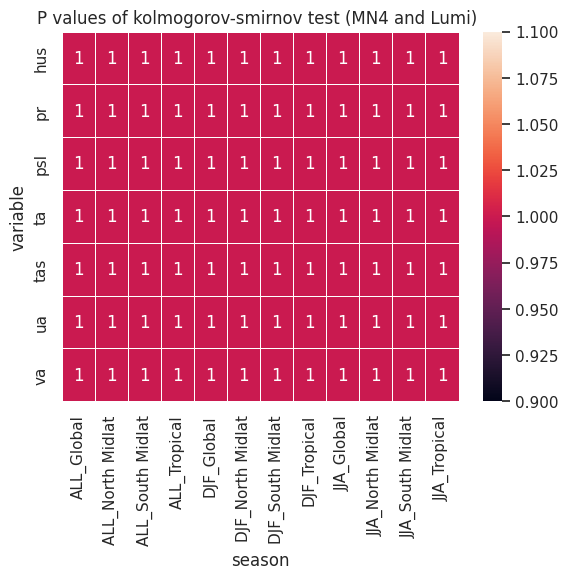

In [29]:
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
# df_new = df_new.drop_duplicates(subset=['variable', 'season'])
flights = df_new.pivot_table(index="variable", columns="season", values="p_value", aggfunc='mean')

# flights = df_new.pivot(index= "variable", columns= "season",values= "p_value")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, linewidths=.5)
plt.title("P values of kolmogorov-smirnov test (MN4 and Lumi) ")
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)
plt.savefig("/gpfs/scratch/dese28/dese28422/ecmean_files/figs/mn4_lumi_KS_test_p_value.png", bbox_inches='tight')

In [29]:
nested_dict = {}

for _, row in df_new.iterrows():
    variable = row['variable']
    season = row['season']
    region = row['region']
    p_value = row['p_value']

    if variable not in nested_dict:
        nested_dict[variable] = {}

    if season not in nested_dict[variable]:
        nested_dict[variable][season] = {}

    nested_dict[variable][season][region] = p_value

nested_dict

{'psl': {'ALL': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'DJF': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'JJA': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0}},
 'tas': {'ALL': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'DJF': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'JJA': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0}},
 'pr': {'ALL': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'DJF': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'JJA': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0}},
 'ta': {'ALL': {'Global': 1.0,
   'North Midlat': 1.0,
   'Tropical': 1.0,
   'South Midlat': 1.0},
  'DJF': {'Global': 1.0,
   'No

In [30]:
dump_yaml("/gpfs/scratch/dese28/dese28422/ecmean_files/YAML/mn4_lumi_KS_test_p_value.yml", nested_dict)